## testing configuration 4

In [1]:
import os, copy, time
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
from cascade.tools import outwash_plotters as out_plt
from cascade.tools import plotters as cascade_plt

In [2]:
ki = 8.75E-3
C = 0.0134
beach_slope = 0.006
min_dune_r = 0.05
max_dune_r = 0.45

In [3]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade4 = Cascade(
        datadir,
        name="config4_outwash100_1yr_only",
        elevation_file="NCB-default-elevation-config4-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
        dune_file="NCB-default-dunes2-config4-dam.npy",
        parameter_file="outwash-parameters.yaml",
        storm_file="cascade-default-storms.npy",
        num_cores=1,  # cascade can run in parallel, can never specify more cores than that
        roadway_management_module=False,
        alongshore_transport_module=False,
        beach_nourishment_module=False,
        community_economics_module=False,
        outwash_module=True,
        alongshore_section_count=1,
        time_step_count=2,
        wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
        wave_period=7,
        wave_asymmetry=0.8,
        wave_angle_high_fraction=0.2,
        bay_depth=3.0,
        s_background=0.001,
        berm_elevation=1.46,
        MHW=0.36,
        beta=beach_slope,
        sea_level_rise_rate=0.004,
        sea_level_rise_constant=True,
        background_erosion=0.0,
        min_dune_growth_rate=min_dune_r,
        max_dune_growth_rate=max_dune_r,
        road_ele=1.7,  # ---------- roadway management --------------- #
        road_width=30,
        road_setback=30,
        dune_design_elevation=3.7,
        dune_minimum_elevation=2.2,
        trigger_dune_knockdown=False,
        group_roadway_abandonment=None,
        nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
        nourishment_volume=300.0,
        overwash_filter=40,
        overwash_to_dune=10,
        number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
        sand_cost=10,
        taxratio_oceanfront=1,
        external_housing_market_value_oceanfront=6e5,
        external_housing_market_value_nonoceanfront=4e5,
        fixed_cost_beach_nourishment=2e6,
        fixed_cost_dune_nourishment=2e5,
        nourishment_cost_subsidy=10e6,
        house_footprint_x=15,
        house_footprint_y=20,
        beach_full_cross_shore=70,
        outwash_storms_file="outwash_storms_yr1_only.npy",  # --------- outwasher (in development) ------------ #
        percent_washout_to_shoreface=100,
        outwash_beach_file="NCB-default-beach-config4-damMHW.npy",
        dune_flow_dynamics="full",
        ki_value=ki,
        c=C,
    )

In [4]:
t0 = time.time()

for time_step in range(cascade4._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade4.update()
    if cascade4.b3d_break:
        break

t1 = time.time()

t_total_seconds = t1-t0
t_total_minutes = t_total_seconds/60
t_total_hours = t_total_seconds/3600
print(t_total_hours)

 Time Step:  0
 start outwash storm
 end outwash storm 
0.41664034843444825


In [5]:
print(t_total_minutes)

24.998420906066894


outwash volume is:  47142  m3
back-barrier erosion:  26387  m3


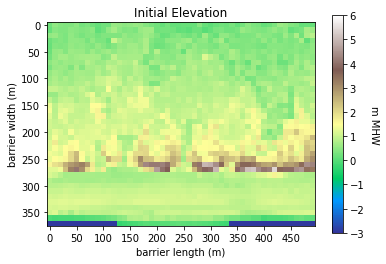

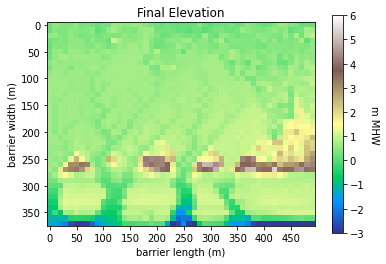

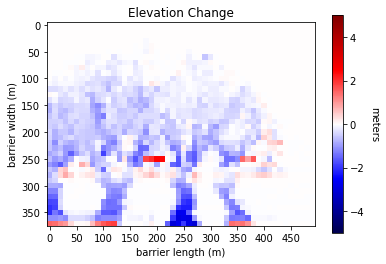

In [6]:
# plt.rcParams['figure.figsize'] = (10,6)
# plt.rcParams.update({"font.size": 15})

initial_domain4 = cascade4.outwash[0]._initial_full_domain
final_domain4 = cascade4.outwash[0]._full_domain
domain_change4 = final_domain4-initial_domain4

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain4*10,
    cmap="terrain",
    vmin=-3, vmax=6.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(initial_domain4)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 5))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(initial_domain4)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 5))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain4[:, :]*10,
    cmap="terrain",
    vmin=-3, vmax=6.0,
)
ax2.set_xlabel('barrier length (m)')
ax2.set_ylabel('barrier width (m)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)
xtick_max = np.shape(final_domain4)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 5))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(final_domain4)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 5))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# plotting domain elevation change
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change4*10,
    cmap="seismic",
    vmin=-5, vmax=5,
)
ax3.set_xlabel('barrier length (m)')
ax3.set_ylabel('barrier width (m)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)
xtick_max = np.shape(domain_change4)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 5))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain_change4)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 5))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# print("outwash flux is: ", int(round(cascade4.outwash[0]._outwash_flux_TS[1],0)), " m3/m")
print("outwash volume is: ", int(round(cascade4.outwash[0]._outwash_TS[1], 0)), " m3")
print("back-barrier erosion: ", int(round(np.sum(-domain_change4[0:28, :]*10*100), 0)), " m3")
